In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from sklearn import preprocessing

In [2]:
df=pd.read_csv('NSLD.csv',sep=',',header=None, names=['Z','E1','E2','EXT','HP'], skiprows=1)
df

,Z,E1,E2,EXT,HP
0,-3.0000,NaN,NaN,NaN,NaN
1,-2.9999,NaN,NaN,NaN,NaN
2,-2.9998,NaN,NaN,NaN,NaN
3,-2.9997,NaN,NaN,NaN,NaN
4,-2.9996,NaN,NaN,NaN,NaN
...,...,...,...,...,...
59996,2.9996,NaN,NaN,NaN,NaN
59997,2.9997,NaN,NaN,NaN,NaN
59998,2.9998,NaN,NaN,NaN,NaN
59999,2.9999,NaN,NaN,NaN,NaN


In [3]:
E1_span = 5.36
E1_span/2

2.68

In [4]:
E1 = pd.DataFrame(df, columns=['Z','E1'])
E1 = E1[E1.Z >= -2.68]
E1 = E1[E1.Z <= 2.68]

In [5]:
E2_span = 5.45
E2_span/2

2.725

In [6]:
E2 = pd.DataFrame(df, columns=['Z','E2'])
E2 = E2[E2.Z >= -2.725]
E2 = E2[E2.Z <= 2.725]

In [7]:
EXT = pd.DataFrame(df, columns=['Z','EXT'])
EXT_span = 2.6578 *2
HP = pd.DataFrame(df, columns=['Z','HP'])
HP_span = 2.7102 *2

In [8]:
E_1 = E1
E_1.Z = E_1.Z+2.68

E_2 = E2
E_2.Z = E_2.Z+2.7250

EXT_ = EXT
EXT_.Z = EXT_.Z+2.6578

HP_ = HP
HP_.Z = HP_.Z+2.7102

In [9]:
-1*(E1_span/2)

-2.68

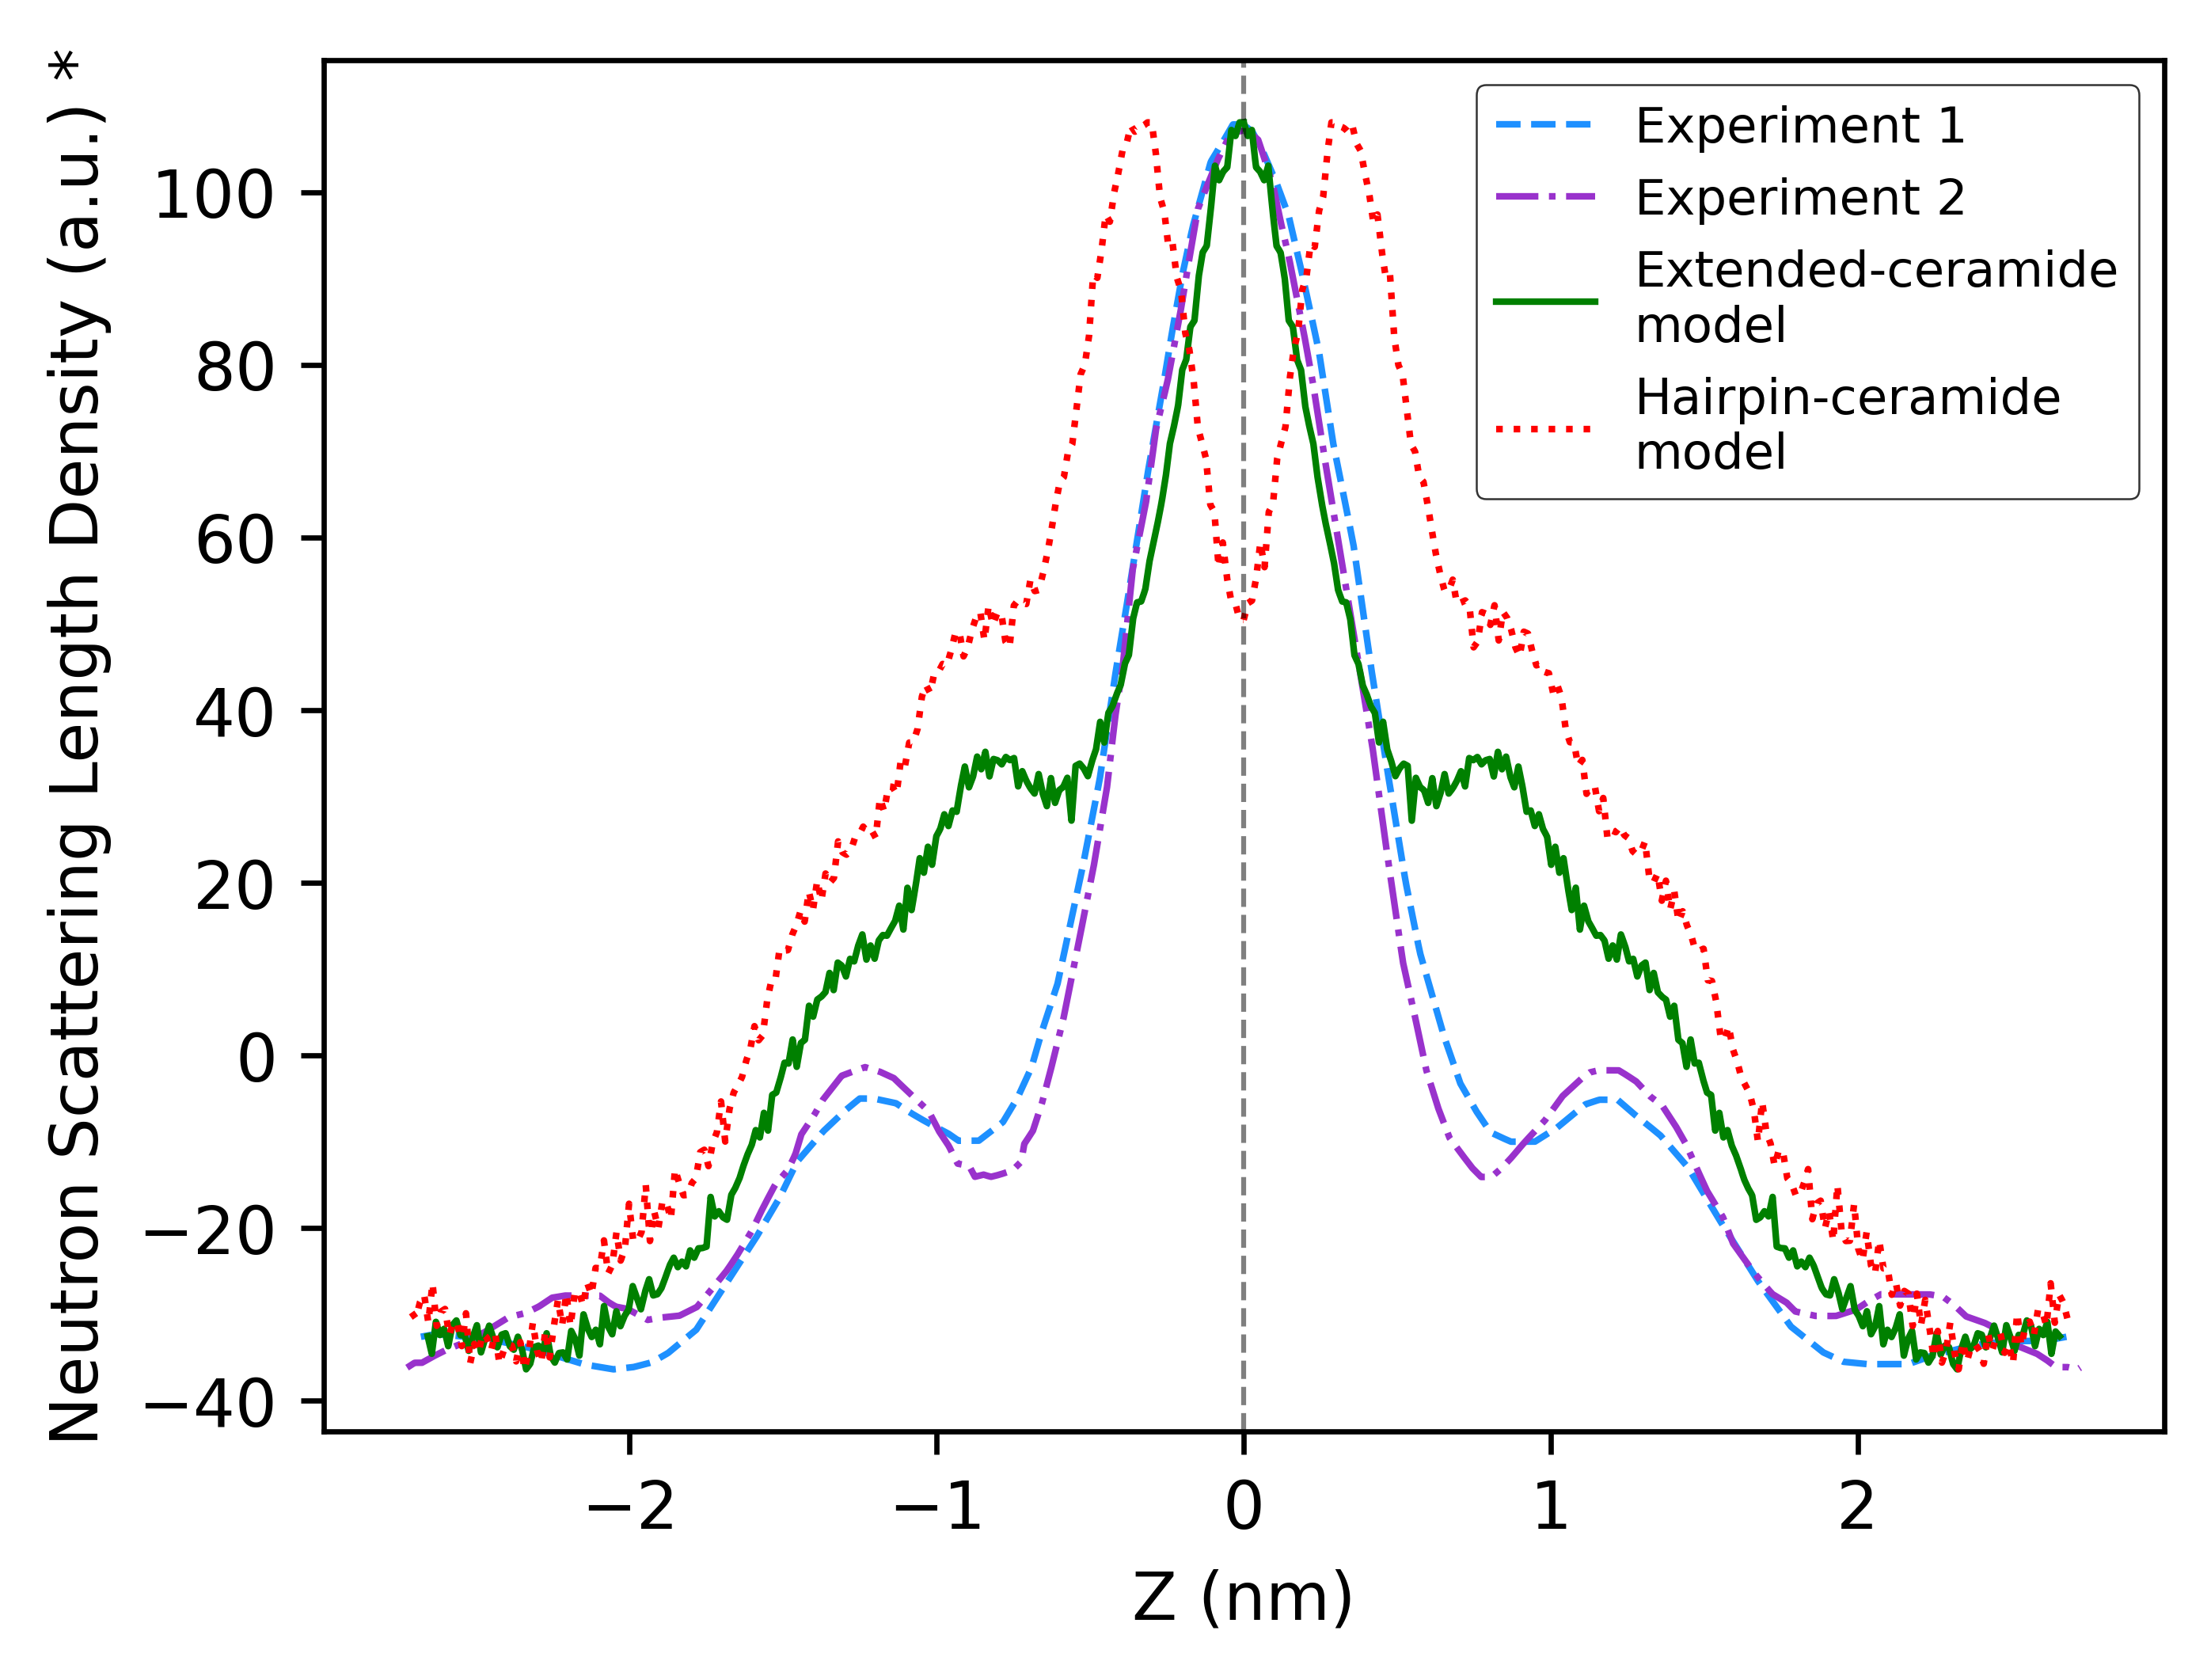

In [10]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
figure(num=None, figsize=(5,3.75), dpi=600)

plt.plot(E_1[E_1.Z <= E1_span/2].Z, E_1[E_1.Z <= E1_span/2].E1, linewidth=1.0, alpha=1.0, color='dodgerblue', label="Experiment 1", ls='--')
plt.plot(E_2[E_2.Z <= E2_span/2].Z, E_2[E_2.Z <= E2_span/2].E2, linewidth=1.0, alpha=1.0, color='darkorchid', label="Experiment 2", ls='-.')
plt.plot(EXT_[EXT_.Z <= EXT_span/2].Z, EXT_[EXT_.Z <= EXT_span/2].EXT, linewidth=1.0, alpha=1.0, color='green', label="Extended-ceramide\nmodel")
plt.plot(HP_[HP_.Z <= HP_span/2].Z, HP_[HP_.Z <= HP_span/2].HP, linewidth=1.0, alpha=1.0, color='red', label="Hairpin-ceramide\nmodel", ls=':')

plt.plot(E_1[E_1.Z >= E1_span/2].Z-E1_span, E_1[E_1.Z >= E1_span/2].E1, linewidth=1.0, alpha=1.0, color='dodgerblue', ls='--')
plt.plot(E_2[E_2.Z >= E2_span/2].Z-E2_span, E_2[E_2.Z >= E2_span/2].E2, linewidth=1.0, alpha=1.0, color='darkorchid', ls='-.')
plt.plot(EXT_[EXT_.Z >= EXT_span/2].Z-EXT_span, EXT_[EXT_.Z >= EXT_span/2].EXT, linewidth=1.0, alpha=1.0, color='green')
plt.plot(HP_[HP_.Z >= HP_span/2].Z-HP_span, HP_[HP_.Z >= HP_span/2].HP, linewidth=1.0, alpha=1.0, color='red', ls=':')

plt.ylabel('Neutron Scattering Length Density (a.u.) *', fontsize=10)
plt.xlabel('Z (nm)', fontsize=10)
leg = plt.legend(fontsize=7.5)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(0.3)

plt.axvline(x = 0, color = 'black', linestyle='--', linewidth=0.75, alpha=0.5)